#  <font color='red'> Review of 2D Gaussian distribution  </font>


In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import scipy as sc
from scipy.stats import multivariate_normal
from numpy import linalg as la

## Set mean and standard deviation and plot the pdf


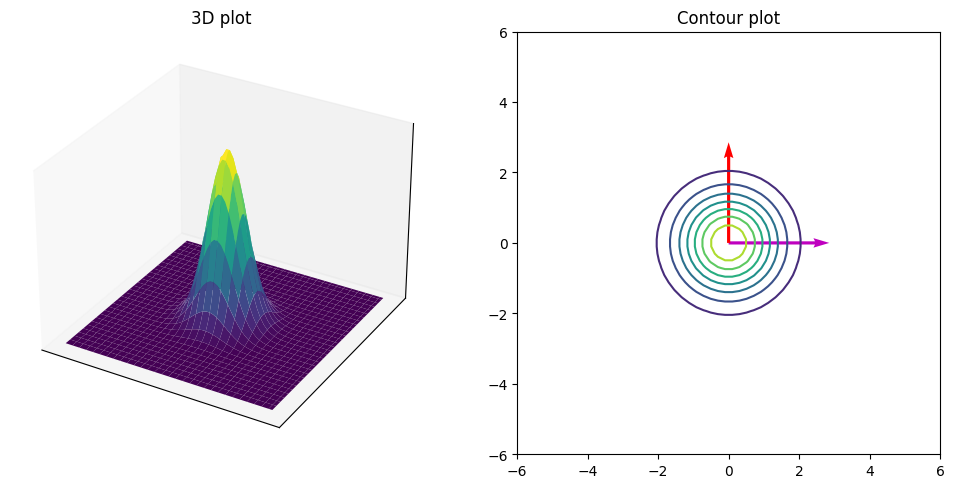

In [4]:
# Setting up the grid for plotting
N = 60
X = np.linspace(-6, 6, N)
Y = np.linspace(-6, 6, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# Parameters of the Gaussian

mu = np.array([0, 0]) # Mean
sigma = np.array([[1, 0], [0, 1]]) # Covariance matrix
F = multivariate_normal(mu, sigma)
Z = F.pdf(pos)

# Plotting
fig1 = plt.figure(figsize=[12,6])
ax1 = fig1.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z,cmap=cm.viridis)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_title('3D plot')


ax2 = fig1.add_subplot(1, 2, 2)
cs = plt.contour(X,Y,Z)

# Eigen decomposition of Sigma
lam, u = la.eig(sigma)
origin = [0], [0] # origin point
eig_vec1 = 5*u[:,0]*np.sqrt(lam[0])
eig_vec2 = 5*u[:,1]*np.sqrt(lam[1])
plt.quiver(*origin, *eig_vec1, color=['m'], scale=21)
plt.quiver(*origin, *eig_vec2, color=['r'], scale=21)
ax2.set_title('Contour plot')
ax2.set_aspect('equal')

plt.show()



## Draw samples from the distribution and plot

Note that the features are uncorrelated and are equally distributed (variance or spread  is the same in both directions)

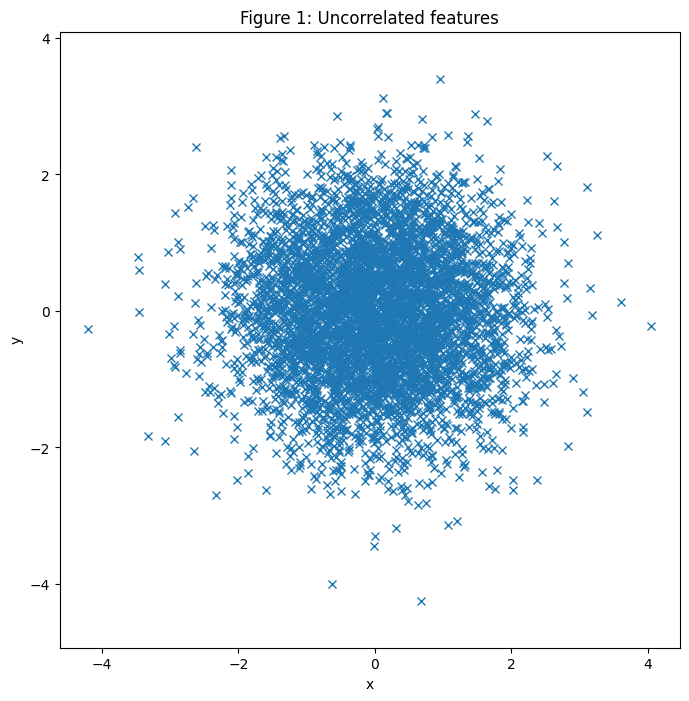

In [5]:
# Drawing Nsamples points from the Gaussian distribution
Nsamples = 5000
x, y = np.random.multivariate_normal(mu, sigma, Nsamples).T

# Plotting
fig0 = plt.figure(figsize=[8,8])
ax0 = fig0.add_subplot(1, 1, 1)
s=plt.plot(x, y, 'x')
s=plt.xlabel('x')
s=plt.ylabel('y')
s=plt.axis('equal')
s=ax0.set_title("Figure 1: Uncorrelated features")

##  <font color=blue> Gaussian distribution with non-diagonal Covariance matrix </font>

Assume that the features you have come from a Gaussian distribution with non-diagonal Covariance matrix, which implies that  the variables are correlated and hence dependent. The mean is also non zero

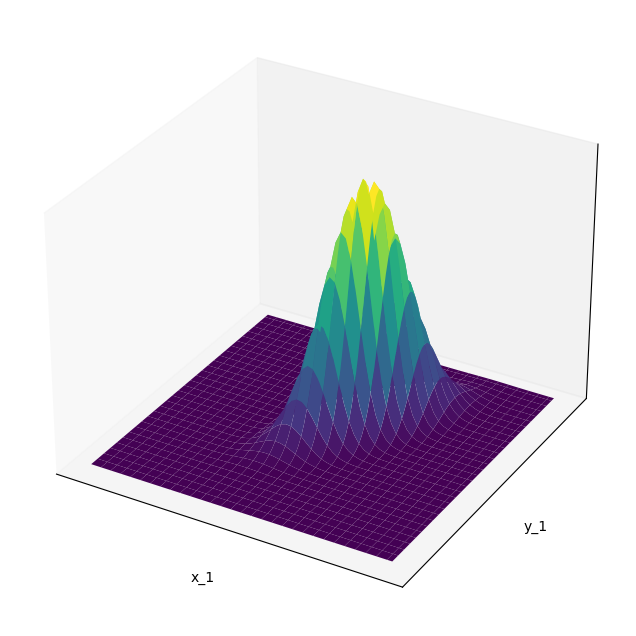

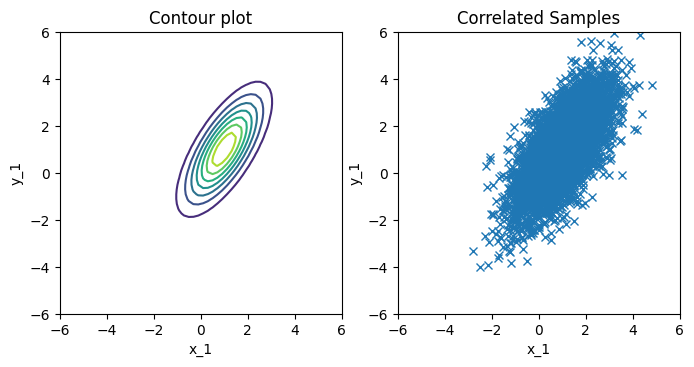

In [6]:
# Gaussian parameters
mu1 = np.array([1, 1])
sigma1 = np.array([[1, 1], [1, 2]])

# Gaussian pdf
F1 = multivariate_normal(mu1, sigma1)
Z1 = F1.pdf(pos)

# Plotting the pdf
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.add_subplot(1, 1, 1, projection='3d')
ax1.plot_surface(X, Y, Z1,cmap=cm.viridis)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax2.set_title('3D plot')
plt.xlabel('x_1')
plt.ylabel('y_1')

# Contour plot of the pdf
fig2 = plt.figure(figsize=[8,8])
ax2 = fig2.add_subplot(1, 2, 1)
ax2 = fig2.gca();
cs = plt.contour(X,Y,Z1)
ax2.set_title('Contour plot')
ax2.set_aspect('equal')
plt.xlabel('x_1')
plt.ylabel('y_1')

# Drawing 5000 points from the distribution
Nsamples = 5000
x1, y1 = np.random.multivariate_normal(mu1, sigma1, Nsamples).T

# Plotting the features
ax3 = fig2.add_subplot(1, 2, 2)
plt.plot(x1, y1, 'x')
plt.xlim([-6,6])
plt.ylim([-6,6])
plt.xlabel('x_1')
plt.ylabel('y_1')

ax3.set_title('Correlated Samples')
ax3.set_aspect('equal')


##  Scaled eigen vectors
    
Given the data (x1,y1), one can compute the co-variance matrix $\Sigma_\rm{\rm est}$. The off diagonal entries will indicate how correlated the features are. The eigen decomposition of $\Sigma_\rm{\rm est}$ can show the principal directions and scaling in each direction.
    

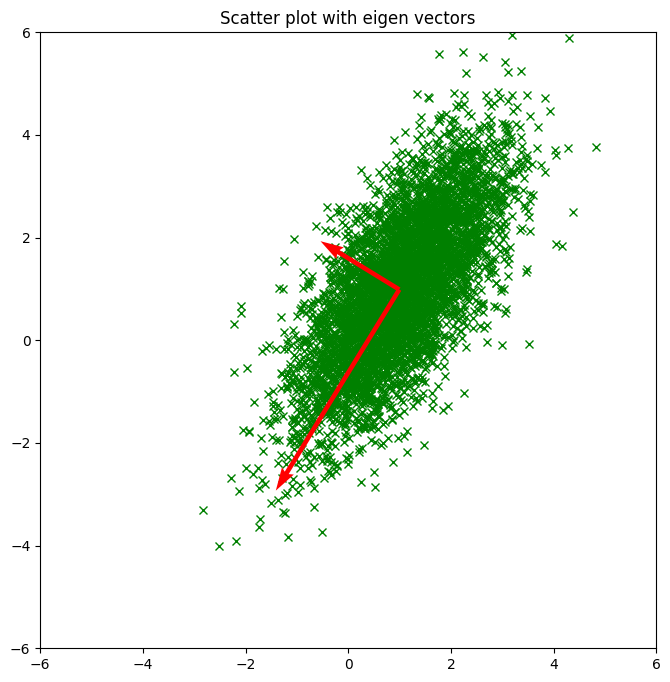

In [7]:
# Making data into a matrix
Data  = np.matrix([x1,y1])

# Estimating the mean and covariance matrix
mu_est = np.array((np.matrix.mean(Data,axis=1)))
Sigma_est = np.cov(Data)

# Plotting the features
fig1 = plt.figure(figsize=[8,8])
ax1 = fig1.gca()
cs = plt.plot(x1, y1, 'gx',zorder=1)
plt.xlim([-6,6])
plt.ylim([-6,6])

# Estimating the eigen vectors of the covariance matrix
lam, u = la.eig(Sigma_est)

# Origin of the vectors
origin = mu_est
# Eigen vectors scaled by the sqrt of the eigen values
eig_vec1 = 5*u[:,0]*np.sqrt(lam[0])
eig_vec2 = 5*u[:,1]*np.sqrt(lam[1])

plt.quiver(*origin, *eig_vec1, color=['r'], scale=21,zorder=2)
plt.quiver(*origin, *eig_vec2, color=['r'], scale=21,zorder=2)
ax1.set_title('Scatter plot with eigen vectors')
ax1.set_aspect('equal')

plt.show()

## <font color=red> To do \#1: Transform the samples using the eigen vectors </font>

The transformed vectors
$$\mathbf x' = \mathbf U^T (\mathbf x-\boldsymbol \mu)$$

will have a zero mean and zero correlation, resulting in independent random variables.


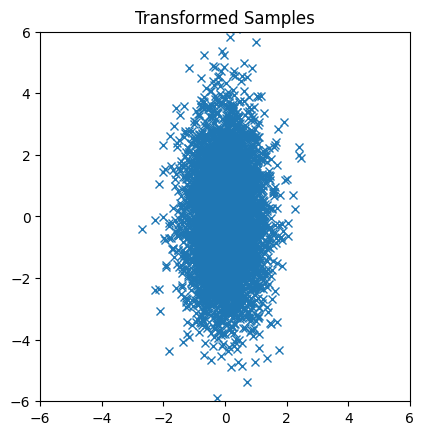

In [30]:
# Stacking features to a matrix
Data  = np.matrix([x1,y1])

# Transformation
# Modify the code below to get uncorrelated and rotated features
#---------------------------------------------------------------
rprime = np.transpose(u) @ (Data - mu_est)
xnew = np.transpose(rprime[0,:])
ynew = np.transpose(rprime[1,:])
#---------------------------------------------------------------

# Plotting
fig4 = plt.figure()
ax4 = fig4.add_subplot(1, 1, 1)
plt.plot(xnew, ynew, 'x')
plt.xlim([-6,6])
plt.ylim([-6,6])
ax4.set_title('Transformed Samples')
ax4.set_aspect('equal')

mu_rotated = np.array((np.matrix.mean(rprime,axis=0)))
Sigma_rotated = np.cov(Data)


## <font color=red> To do \#2: Feature Normalization/Whitening  </font>
    
Most machine learning algorithms work well when the input features are "normalized" (e.g independent and are zero mean). We will now look at a data whitening transformation, which will take the original features and spit out normalized feaures.

Find the expression for the matrix A and vector b such that the transformed features
$$\begin{bmatrix}x_{\rm new}\\y_{\rm new}\end{bmatrix} = \mathbf A \begin{bmatrix}x_{1}\\y_{1}\end{bmatrix} + \mathbf b$$

are uncorrelated and indentically distributed with zero mean as in Figure 1.

The $\mathbf A$ matrix can be obtained as $\mathbf \Sigma^{(-1/2)}$, which can be implemented using the eigen decomposition as

$$\mathbf A = \Lambda^{-1/2}~\mathbf U^T $$

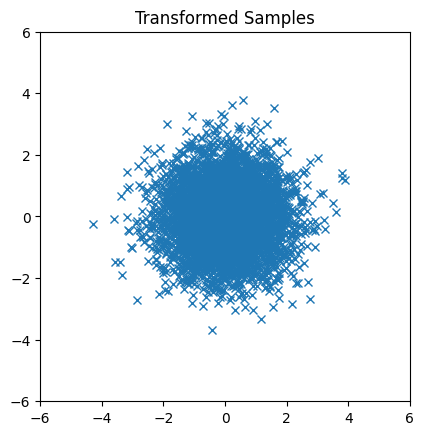

In [28]:
Data  = np.matrix([x1,y1])

# Transformation
A = np.matmul(np.diag(1/np.sqrt(lam)),np.transpose(u))
b = np.matmul(A,mu_est)

# Transformation
# Modify the code below to get uncorrelated and uniformly distributed features
#---------------------------------------------------------------
rprime = A @ (Data - mu_est)
xnew = np.transpose(rprime[0,:])
ynew = np.transpose(rprime[1,:])

#---------------------------------------------------------------

fig4 = plt.figure()
ax4 = fig4.add_subplot(1, 1, 1)
plt.plot(xnew, ynew, 'x')
plt.xlim([-6,6])
plt.ylim([-6,6])
ax4.set_title('Transformed Samples')
ax4.set_aspect('equal')

string = 'figures/whitened.pdf'
plt.savefig(string)
